In [1]:
import numpy as np
import sklearn as sk
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
np.random.seed(2)

In [2]:
import matplotlib.pyplot as plt
import time
from sklearn import model_selection as ml

In [3]:
split_data = mnist.data[0:4900]
split_target = mnist.target[0:4900]

xtrain, xtest, ytrain, ytest = ml.train_test_split(split_data, split_target, train_size=0.7)

In [4]:
from sklearn.svm import SVC

print(xtrain.shape)
print(ytrain.shape)

L = ['linear', 'poly', 'rbf', 'sigmoid']#, 'precomputed']
res = []
temps = []

for k in L:
    print("test with kernel: ", k)
    clf = SVC(kernel = k, gamma = 'auto')
    start = time.time()
    clf.fit(xtrain, ytrain)
    stop = time.time()
    
    res.append(clf.score(xtest, ytest))
    temps.append(stop-start)

(3430, 784)
(3430,)
test with kernel:  linear
test with kernel:  poly
test with kernel:  rbf
test with kernel:  sigmoid


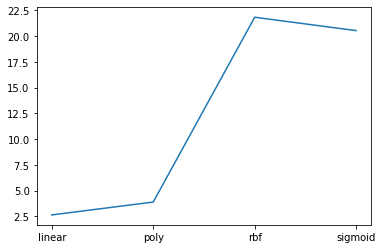

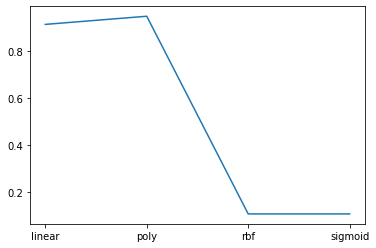

In [5]:
plt.plot(L, temps)
plt.show()

plt.plot(L, res)
plt.show()

In [6]:
from sklearn.svm import SVC

print(xtrain.shape)
print(ytrain.shape)

L = np.linspace(0.1, 1, 5)
res = []
res_train = []
temps = []

for k in L:
    print("test with c: ", k)
    clf = SVC(kernel = 'poly', gamma = 'auto', C = k)
    start = time.time()
    clf.fit(xtrain, ytrain)
    stop = time.time()
    
    res.append(clf.score(xtest, ytest))
    res_train.append(clf.score(xtrain, ytrain))
    temps.append(stop-start)

(3430, 784)
(3430,)
test with c:  0.1
test with c:  0.325
test with c:  0.55
test with c:  0.775
test with c:  1.0


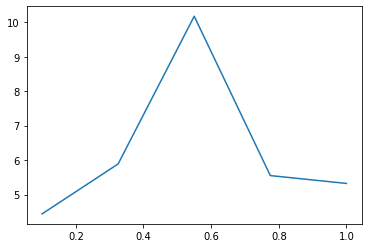

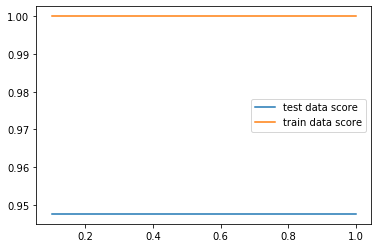

In [7]:
plt.plot(L, temps)
plt.show()

plt.plot(L, res, label="test data score")
plt.plot(L, res_train, label="train data score")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
clf = SVC(kernel = 'poly', gamma = 'auto', C = k)
clf.fit(xtrain, ytrain)

cm = confusion_matrix(ytest, clf.predict(xtest))

In [10]:
print(cm)

[[123   1   0   0   0   2   2   1   0   0]
 [  0 154   0   0   0   1   0   1   0   0]
 [  1   3 151   2   0   0   1   2   1   0]
 [  0   2   2 129   1   2   1   1   1   2]
 [  0   2   3   0 159   0   1   1   0   3]
 [  0   1   1   2   0 120   3   0   1   0]
 [  1   1   0   0   0   0 133   0   0   0]
 [  1   1   1   0   1   0   0 169   0   1]
 [  0   2   1   1   0   1   0   0 110   0]
 [  1   0   1   2   4   0   2   6   1 145]]


## Comparaison des 3 methodes avec les meilleurs hyperparametres pour chacun d'elle

In [26]:
from sklearn import model_selection as ml
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier as mlp

In [27]:
def k_fold(X, Y, n, clf):
    res = []
    kf = ml.KFold(n_splits=n, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        clf.fit(X_train, Y_train)
        
        res.append(clf.score(X_test, Y_test))
        
        return np.mean(res)

k:  2   , score:  0.9408163265306122
k:  3   , score:  0.9530612244897959
k:  4   , score:  0.9244897959183673
k:  5   , score:  0.9306122448979591
k:  6   , score:  0.9387755102040817
k:  7   , score:  0.936734693877551
k:  8   , score:  0.9244897959183673
k:  9   , score:  0.936734693877551
k:  10   , score:  0.9408163265306122
k:  11   , score:  0.9326530612244898
k:  12   , score:  0.9510204081632653
k:  13   , score:  0.936734693877551
k:  14   , score:  0.9306122448979591
k:  15   , score:  0.8959183673469387


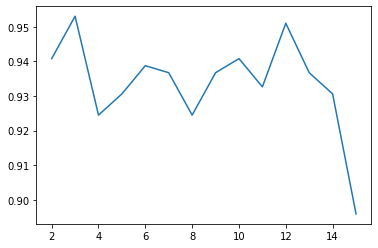

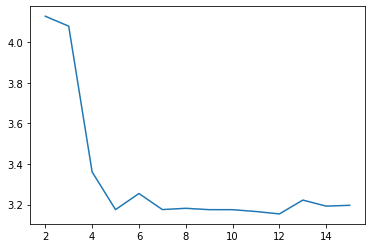

In [28]:
#test des neighbors avec knn sur ces 4900 data pour selctionner le plus opti
n_folds = 10
L = []
G = []
H = []
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)
    start = time.time()
    res = k_fold(split_data, split_target, n_folds, clf)
    stop = time.time()
    L.append(k)
    G.append(res)
    H.append(stop-start)
    print("k: ", k, "  , score: ", res)
    
plt.plot(L,G)
plt.show()

plt.plot(L,H)
plt.show()

In [ ]:
meth = ['knn', 'mlp', 'svc']
temps = []
preci = []
cm = []

In [29]:
#KNN
clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
start = time.time()
clf.fit(xtrain, ytrain)
preci.append(clf.score(xtest, ytest))
stop = time.time()
temps.append(stop-start)
cm.append(confusion_matrix(ytest, clf.predict(xtest)))

In [30]:
#MLP
couches = np.linspace(11, 60, 10, dtype=int)
couches = couches.tolist()
couches.reverse()
couches = tuple(couches)

clf = mlp(hidden_layer_sizes = couches)
start = time.time()
clf.fit(xtrain, ytrain)
preci.append(clf.score(xtest, ytest))
stop = time.time()
temps.append(stop-start)
cm.append(confusion_matrix(ytest, clf.predict(xtest)))

In [31]:
#SVC
clf = SVC(kernel = 'poly', gamma = 'auto', C = k)
start = time.time()
clf.fit(xtrain, ytrain)
preci.append(clf.score(xtest, ytest))
stop = time.time()
temps.append(stop-start)
cm.append(confusion_matrix(ytest, clf.predict(xtest)))

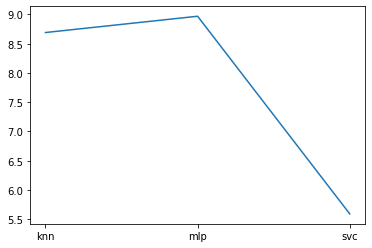

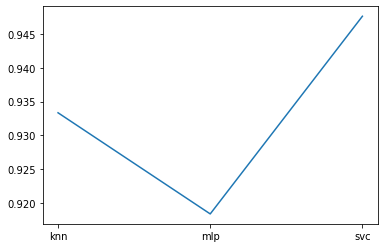

In [32]:
plt.plot(meth, temps)
plt.show()

plt.plot(meth, preci)
plt.show()